# Assignment 4: Michael Matkowski
## Partners: Chris Ethier, Audrey Chase

### Problem 1:

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
# Import the data
df = pd.read_csv('C:\\Users\\student\\Documents\\2019-2020\\cancer.csv')

# Assign input & target variables
x = df.drop(["diagnosis", "id", "Unnamed: 32"], axis=1)
y = df[['diagnosis']]

In [3]:
#View Missing Values
x.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
#Create Dummy Variable For Diagnosis
#y['diagnosis'] = y['diagnosis'].astype(object)
y = df[['diagnosis']].astype(object)
y = pd.get_dummies(y)

In [5]:
#View Data Types To Verify Numerical
x.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [6]:
#Split Data Into Training and Testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
# Create Decision Tree and Train

tree1 = DecisionTreeClassifier(max_depth=3, criterion ='gini')
tree1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
#Accuracy on Training Data
tree1.score(x_train, y_train)

0.9692307692307692

In [9]:
# Prediction and Accuracy on Testing Data
y_pred = tree1.predict(x_test)
e1 = metrics.accuracy_score(y_pred, y_test)
e1

0.9210526315789473

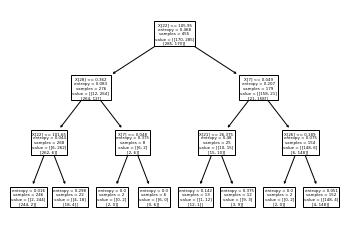

In [11]:
#Visualization of Tree
p = tree.plot_tree(tree1)

### Problem 2:

In [12]:
# Decide What Hyperparameter to Tune and Decide Searching Range
param_grid = {'max_depth': range(2,7)}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
tree2 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [13]:
#Train Decision Tree
tree2.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 7)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [14]:
# Show Best Found Parameters
tree2.best_params_

{'max_depth': 3}

### Problem 3:

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
# Import the data
df = pd.read_csv('C:\\Users\\student\\Documents\\2019-2020\\cancer.csv')

# Assign Input & Target Variables
x = df.drop(["diagnosis", "id", "Unnamed: 32"], axis=1)
y = df[['diagnosis']]

In [17]:
#Create Dummy Variable For Diagnosis
y = df[['diagnosis']].astype(object)
y = pd.get_dummies(y)

In [18]:
#Split Data Into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
# Create Random Forest and Train
rf1 = RandomForestClassifier(n_estimators=15, max_features=4)
rf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
# Accuracy of Training Data
rf1.score(x_train, y_train)

1.0

In [21]:
# Prediction and Accuracy on Testing Data
y_pred = rf1.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

0.956140350877193

### Problem 4:

In [22]:
# Decide What Hyperparameters to Tune and Decide Searching Range
param_grid = {'n_estimators': range(10,25), 'max_features':range(3,10)}

from sklearn.model_selection import GridSearchCV
rf2 = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)

In [23]:
#Train Random Forest
rf2.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [24]:
# Show Best Found Parameters
rf2.best_params_

{'max_features': 4, 'n_estimators': 13}

In [25]:
# Prediction and Accuracy on Testing Data
y_pred2 = rf2.predict(x_test)
metrics.accuracy_score(y_pred2, y_test)

0.9473684210526315

### Question 4 Question Response:

##### The tuning sometimes improves the accuracy of the model when it is run. Since random forests differ each time the command is run because of the process of creating random forests, the results end up differing. I had both examples where the tuning did improve the accuracy of the model when compared to the first random forest, while other times (like the one above), it did not improve the accuracy of the testing data (.9561>.9474).